[](http://)

<h1> CLASSIFICATION </h1>

Models selected for feature extraction are used with supervised learning algorithms to classify:-

1. Logistic Regression
2. Random Forest
3. Linear SVM
4. RBF SVM
5. Sigmoid SVM
6. Poly SVM

In [ ]:

import numpy as np
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from scipy.spatial import distance
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def dataExt(model, optimizer):
    # Load feature ext Data
    filesTrain = "../input/feature-extracted/imgNames/train_data_names.pkl"
    filesTest = "../input/feature-extracted/imgNames/test_data_names.pkl"
    #../input/feature-extracted/InceptionV3_features/InceptionV3_Adagrad_test.npy
    pathTrain = "../input/feature-extracted/" + model + "_features/" + model + "_" + optimizer + "_train.npy"
    pathTest = "../input/feature-extracted/" + model + "_features/" + model + "_" + optimizer + "_test.npy"

    # unload pickle the file names
    with open(filesTrain,'rb') as f:
        file_train_list = np.load(f, allow_pickle=True)

    with open(filesTest,'rb') as f:
        file_test_list = np.load(f, allow_pickle=True)
    # data preprocessing
    file_train_list = [i[18:] for i in file_train_list]
    file_test_list = [i[17:] for i in file_test_list]

    feat_train_np = np.load(pathTrain)
    feat_test_np = np.load(pathTest)
    # return all the data of features of specific model
    return file_train_list, file_test_list, feat_train_np, feat_test_np

<h1> Logistic Regression </h1>

In [ ]:
def LogReg(model, optimizer, X_train, y_train, X_test, y_test):
    print("Logistic Regression", model, optimizer)
    # extract data using function made above
    a,b,c,d = dataExt(model, optimizer)

    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]
    #data preprocessing
    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)

    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)

    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)
    #actual model of logistic regression from sklearn library
    Model = LogisticRegression()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)
    # check the accuracy p, r,f
    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Random Forest </h1>

In [ ]:
def RandFor(model, optimizer, X_train, y_train, X_test, y_test):
    print("Logistic Regression", model, optimizer)

    a,b,c,d = dataExt(model, optimizer)

    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]

    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)

    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)

    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)

    Model = RandomForestClassifier()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)

    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Linear SVM </h1>

In [ ]:

def LinearSVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("Linear SVM", model, optimizer)

    a,b,c,d = dataExt(model, optimizer)

    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]

    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)

    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)

    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)

    Model = svm.SVC(kernel='linear') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)

    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Rbf SVM </h1>

In [ ]:
def RbfSVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("RBF SVM", model, optimizer)

    a,b,c,d = dataExt(model, optimizer)

    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]

    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)

    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)

    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)

    Model = svm.SVC(kernel='rbf') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)

    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Sigmoid SVM </h1>

In [ ]:
def SigmoidSVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("Sigmoid SVM", model, optimizer)

    a,b,c,d = dataExt(model, optimizer)

    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]

    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)

    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)

    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)

    Model = svm.SVC(kernel='sigmoid') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)

    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Poly SVM </h1>

In [ ]:
def PolySVM(model, optimizer, X_train, y_train, X_test, y_test):
    print("POLY SVM", model, optimizer)

    a,b,c,d = dataExt(model, optimizer)

    def name2feat(string):
        try:
            index = a.index(string)
            return c[index]
        except:
            index = b.index(string)
            return d[index]

    X_train['img1'] = X_train['img1'].apply(name2feat)
    X_train['img2'] = X_train['img2'].apply(name2feat)
    X_test['img1'] = X_test['img1'].apply(name2feat)
    X_test['img2'] = X_test['img2'].apply(name2feat)

    new_data_train = []
    for index,row in X_train.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_train.append(new_list)

    new_data_test = []
    for index,row in X_test.iterrows():
        new_list = list(row[0])
        new_list.extend(row[1])
        new_data_test.append(new_list)

    Model = svm.SVC(kernel='poly') #rbf by default svm.SVC()
    Model.fit(new_data_train, y_train)
    y_pred = Model.predict(new_data_test)

    print("Acuracy", accuracy_score(y_test, y_pred))
    print("P,R,F1:",precision_recall_fscore_support(y_test, y_pred, average='macro'))
    df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred,normalize = 'true'), index = [i for i in "01"],
                  columns = [i for i in "01"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True)

<h1> Classification Results </h1>

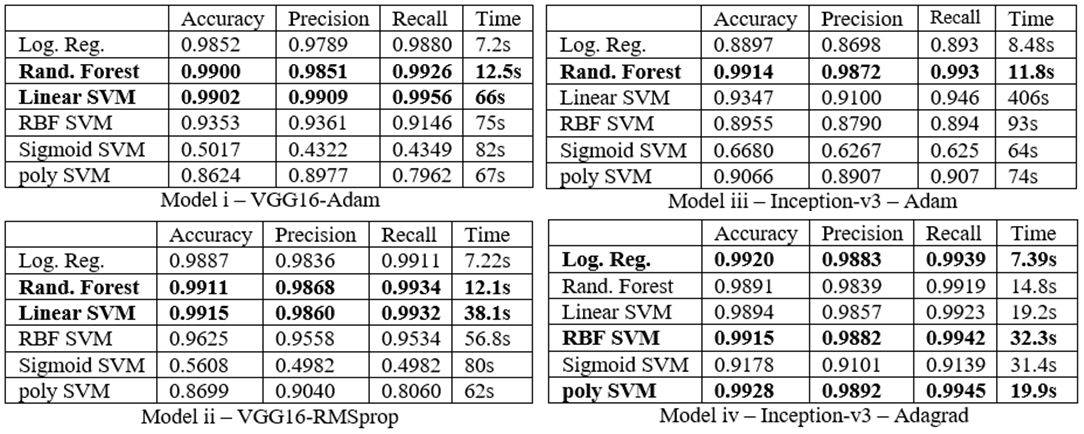

<h1> Logistic Regression Test </h1>

In [ ]:
try:
    %%time
    data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
    X_data = data[['img1','img2']]
    y_data = data[['target']]
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
    LogReg('VGG16', 'Adam', X_train, y_train, X_test, y_test)
except:
    pass

In [ ]:
try:
    %%time
    data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
    X_data = data[['img1','img2']]
    y_data = data[['target']]
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
    LogReg('VGG16','RMSprop', X_train, y_train, X_test, y_test)
except:
    pass

In [ ]:
try:
    %%time
    data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
    X_data = data[['img1','img2']]
    y_data = data[['target']]
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
    LogReg('InceptionV3','Adam', X_train, y_train, X_test, y_test)
except:
    pass

In [ ]:
try:
    %%time
    data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
    X_data = data[['img1','img2']]
    y_data = data[['target']]
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
    LogReg('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)
except:
    pass

<h1> Random Forest </h1>

Logistic Regression VGG16 Adam
Acuracy 0.9910219170847636
P,R,F1: (0.9867704280155642, 0.9932965299684542, 0.989922175065715, None)
CPU times: user 12.4 s, sys: 927 ms, total: 13.4 s
Wall time: 17.2 s


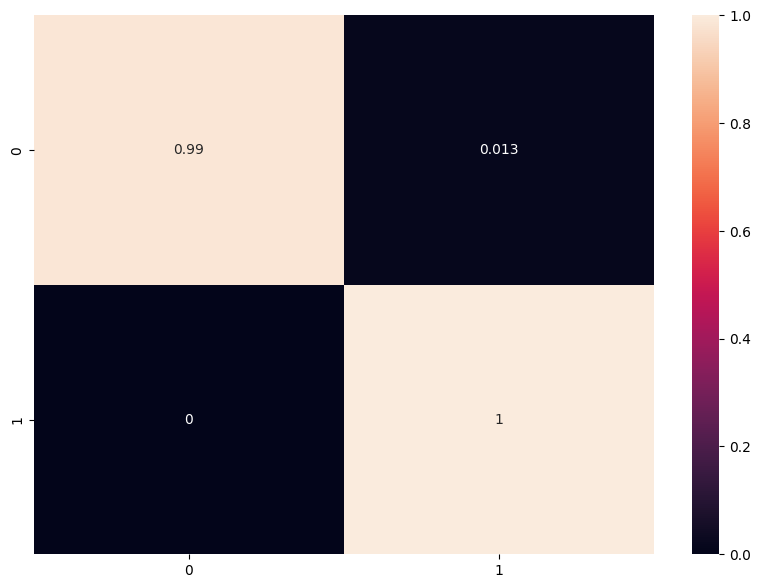

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('VGG16','Adam', X_train, y_train, X_test, y_test)

Logistic Regression VGG16 RMSprop
Acuracy 0.9910219170847636
P,R,F1: (0.9867961165048544, 0.993289915137162, 0.9899320134495251, None)
CPU times: user 14.4 s, sys: 480 ms, total: 14.8 s
Wall time: 16.3 s


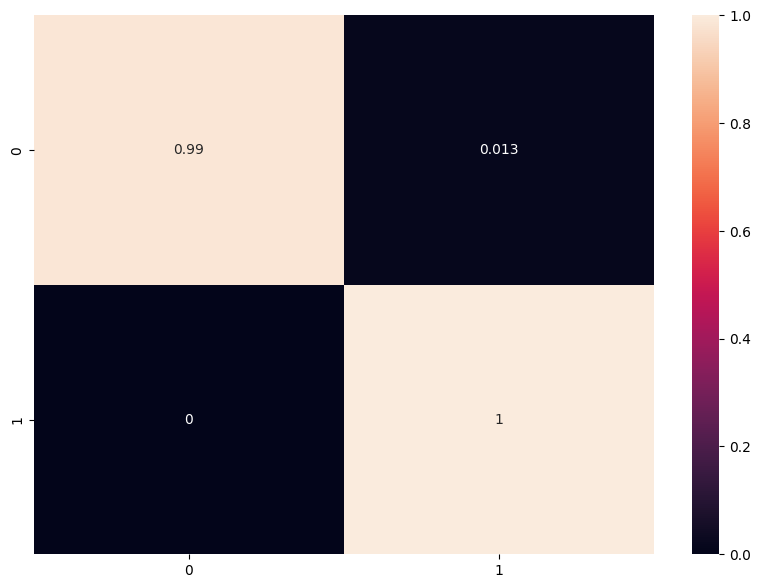

In [ ]:

%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('VGG16','RMSprop', X_train, y_train, X_test, y_test)

Logistic Regression InceptionV3 Adam
Acuracy 0.9911539477158701
P,R,F1: (0.9867641248518373, 0.9934442270058708, 0.989993775909269, None)
CPU times: user 7.2 s, sys: 398 ms, total: 7.6 s
Wall time: 7.5 s


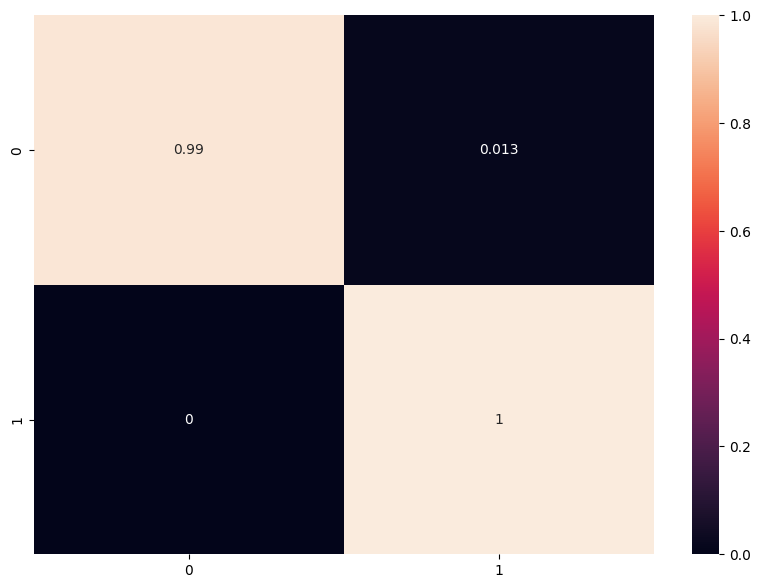

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('InceptionV3','Adam', X_train, y_train, X_test, y_test)

Logistic Regression InceptionV3 Adagrad
Acuracy 0.9910219170847636
P,R,F1: (0.9869781692837993, 0.9932419002186443, 0.9900011407698326, None)
CPU times: user 13.6 s, sys: 419 ms, total: 14.1 s
Wall time: 14 s


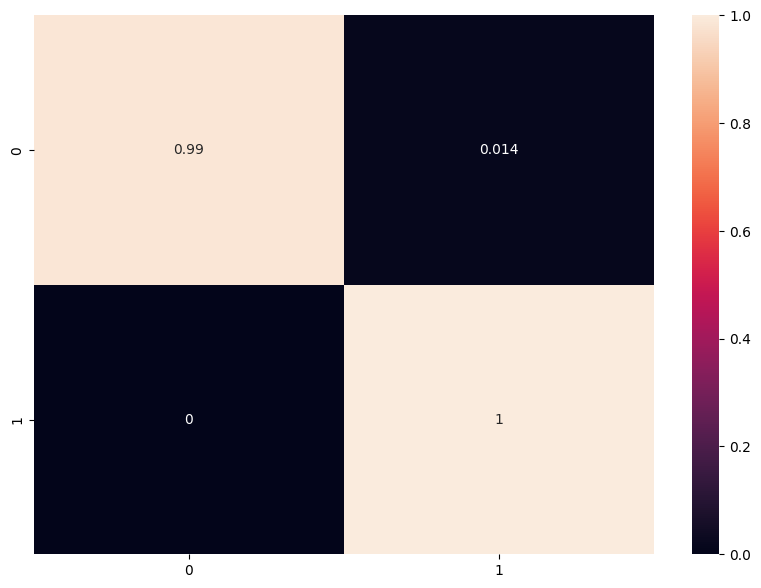

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RandFor('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> Linear SVM Test </h1>

Linear SVM VGG16 Adam
Acuracy 0.9912859783469765
P,R,F1: (0.9870638965111721, 0.9935154254273924, 0.9901837309347382, None)
CPU times: user 1min 32s, sys: 1.64 s, total: 1min 33s
Wall time: 1min 44s


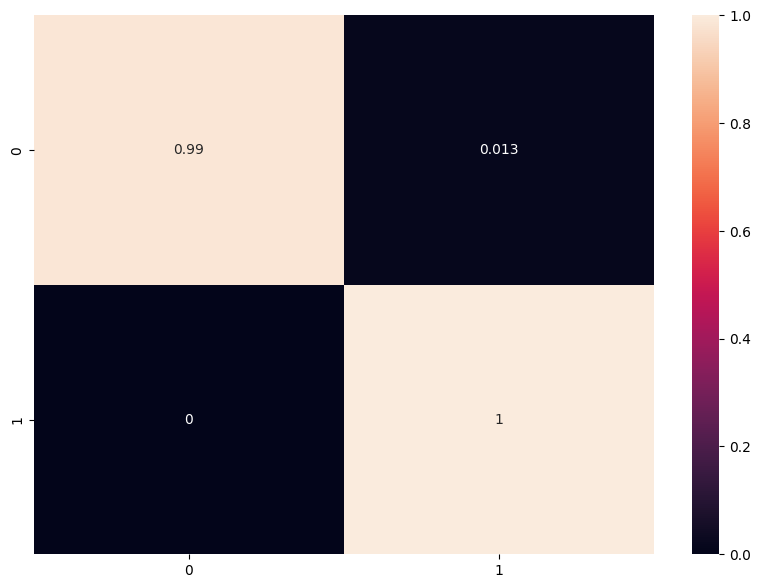

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('VGG16','Adam', X_train, y_train, X_test, y_test)

Linear SVM VGG16 RMSprop
Acuracy 0.9903617639292316
P,R,F1: (0.9859571596506386, 0.9926904672964534, 0.9892032658001256, None)
CPU times: user 30.7 s, sys: 413 ms, total: 31.1 s
Wall time: 31.2 s


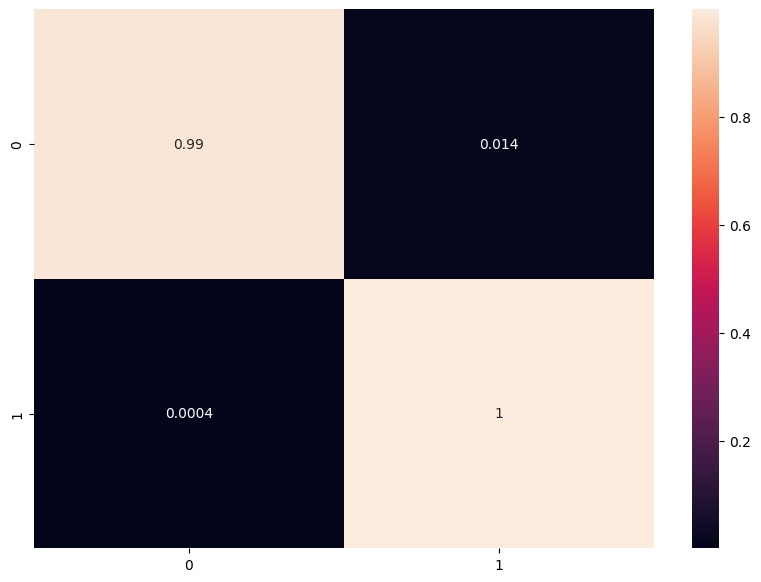

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('VGG16','RMSprop', X_train, y_train, X_test, y_test)

Linear SVM InceptionV3 Adam
Acuracy 0.930287826775812
P,R,F1: (0.912669533575918, 0.9480212640283521, 0.9247422482523917, None)
CPU times: user 8min 7s, sys: 1.55 s, total: 8min 8s
Wall time: 8min 17s


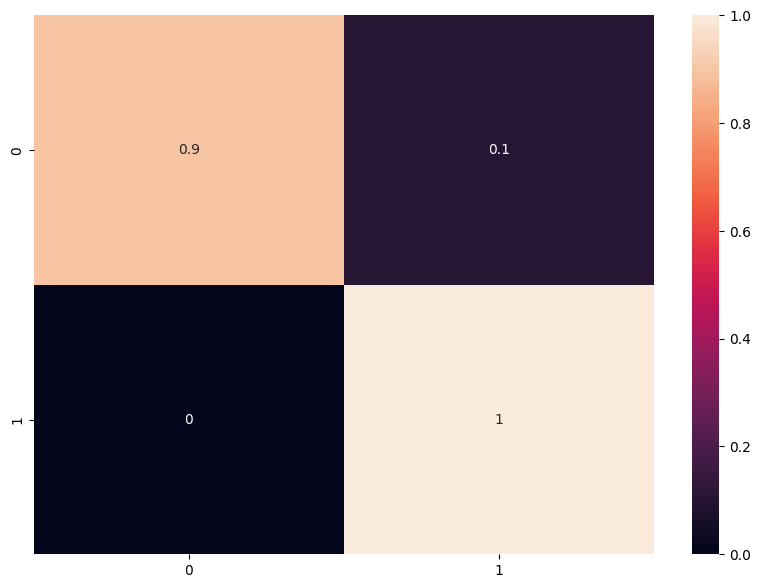

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('InceptionV3','Adam', X_train, y_train, X_test, y_test)

Linear SVM InceptionV3 Adagrad
Acuracy 0.9883813044626353
P,R,F1: (0.9830948117790028, 0.9908792859268681, 0.9868373572970086, None)
CPU times: user 26.2 s, sys: 486 ms, total: 26.7 s
Wall time: 26.7 s


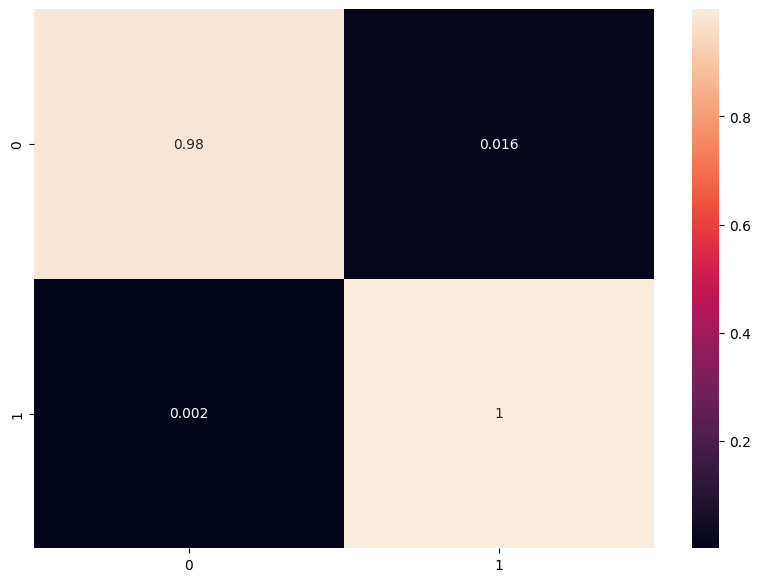

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
LinearSVM('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> RBF SVM Test </h1>

RBF SVM VGG16 Adam
Acuracy 0.9342487457090045
P,R,F1: (0.9361181463253545, 0.9137825062237728, 0.9236669257343948, None)
CPU times: user 1min 39s, sys: 533 ms, total: 1min 40s
Wall time: 1min 40s


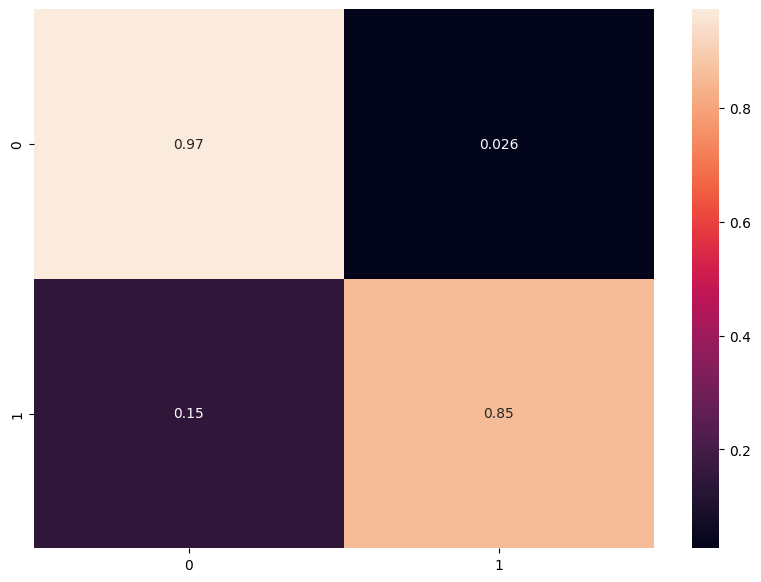

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('VGG16','Adam', X_train, y_train, X_test, y_test)

RBF SVM VGG16 RMSprop
Acuracy 0.9593345656192237
P,R,F1: (0.9566626334108416, 0.9522303907547311, 0.9543890520836266, None)
CPU times: user 1min 19s, sys: 521 ms, total: 1min 19s
Wall time: 1min 19s


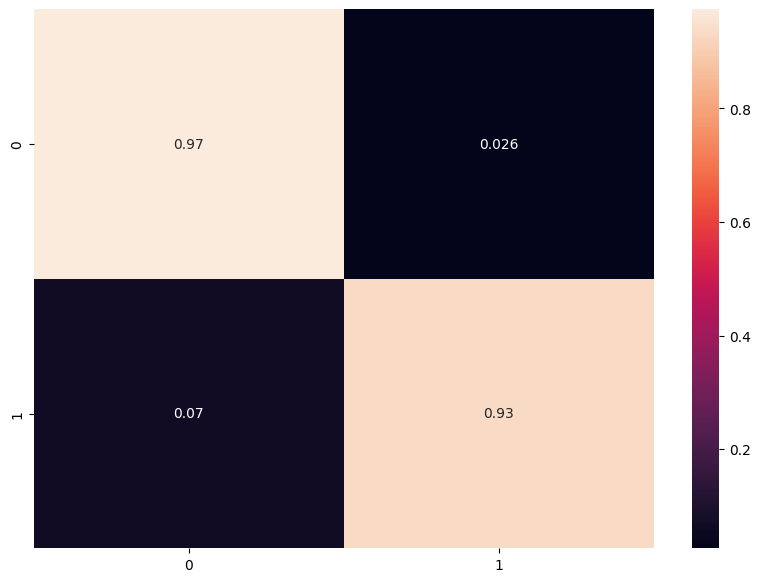

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('VGG16','RMSprop', X_train, y_train, X_test, y_test)

RBF SVM InceptionV3 Adam
Acuracy 0.9079746501188276
P,R,F1: (0.8912845957021827, 0.9089762269384916, 0.8988309232138819, None)
CPU times: user 2min 5s, sys: 592 ms, total: 2min 5s
Wall time: 2min 6s


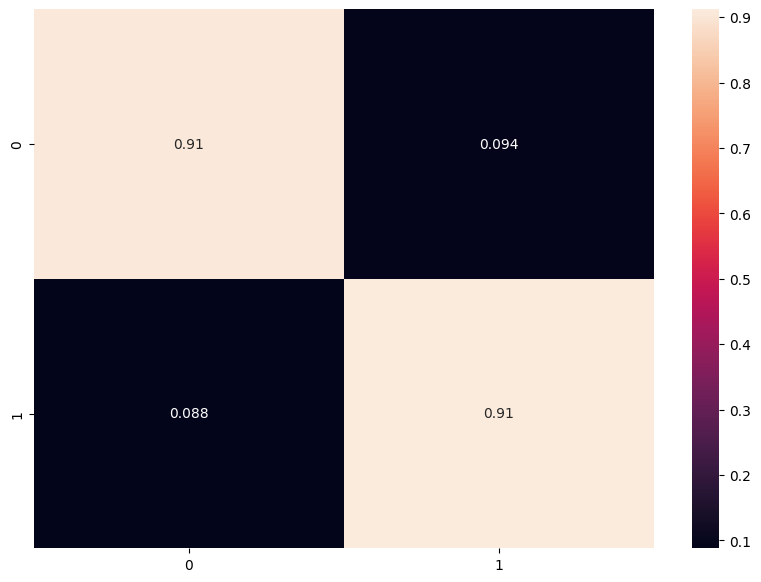

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('InceptionV3','Adam', X_train, y_train, X_test, y_test)

RBF SVM InceptionV3 Adagrad
Acuracy 0.9907578558225508
P,R,F1: (0.9866920152091254, 0.9930195452732349, 0.9897415000419876, None)
CPU times: user 37.2 s, sys: 441 ms, total: 37.7 s
Wall time: 37.7 s


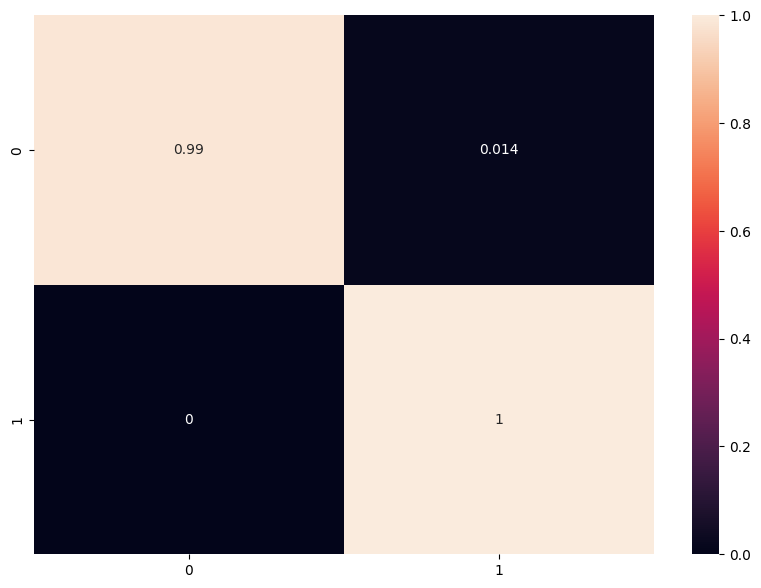

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
RbfSVM('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> Sigmoid SVM Test </h1>

Sigmoid SVM VGG16 Adam
Acuracy 0.4988117243200422
P,R,F1: (0.4319843884626382, 0.4324566170318136, 0.4322114579482367, None)
CPU times: user 3min 19s, sys: 649 ms, total: 3min 20s
Wall time: 3min 20s


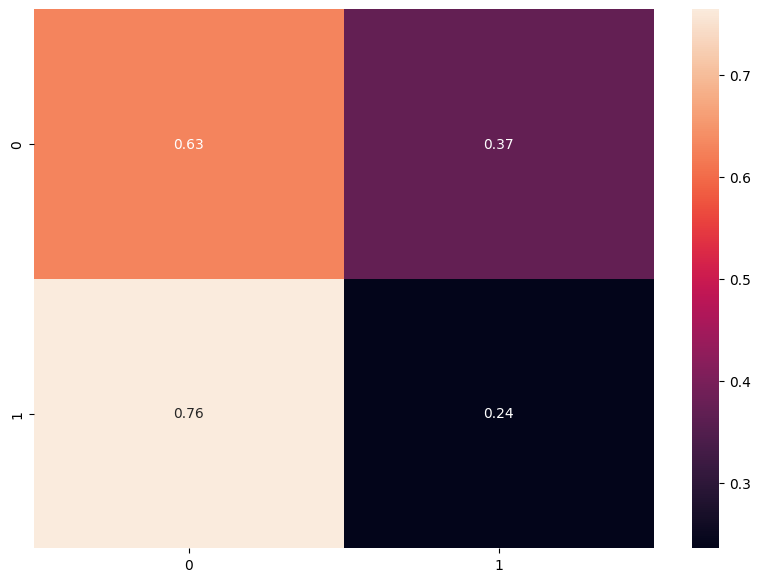

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('VGG16','Adam', X_train, y_train, X_test, y_test)

Sigmoid SVM VGG16 RMSprop
Acuracy 0.5537364668603116
P,R,F1: (0.49325994165689135, 0.4931755703972316, 0.49318286636688574, None)
CPU times: user 1min 51s, sys: 508 ms, total: 1min 51s
Wall time: 1min 52s


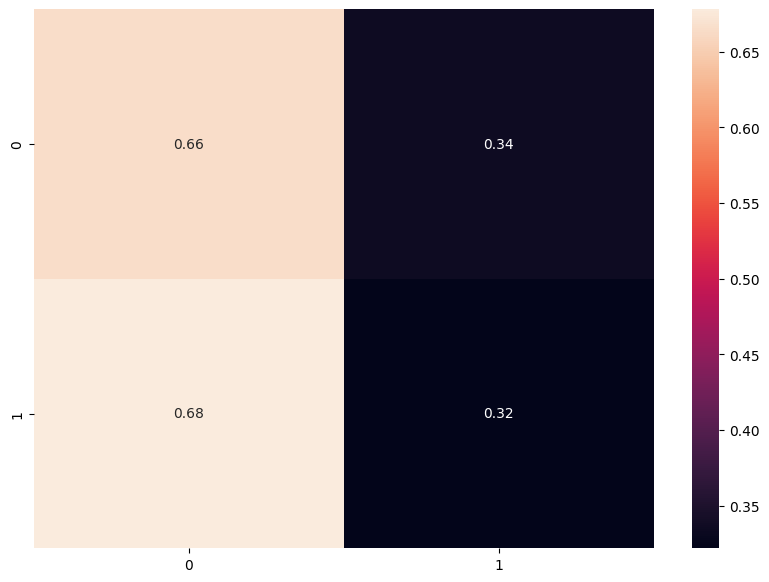

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('VGG16','RMSprop', X_train, y_train, X_test, y_test)

Sigmoid SVM InceptionV3 Adam
Acuracy 0.6609453393187219
P,R,F1: (0.6148944717406755, 0.61264234540452, 0.6136495387161855, None)
CPU times: user 1min 32s, sys: 473 ms, total: 1min 33s
Wall time: 1min 33s


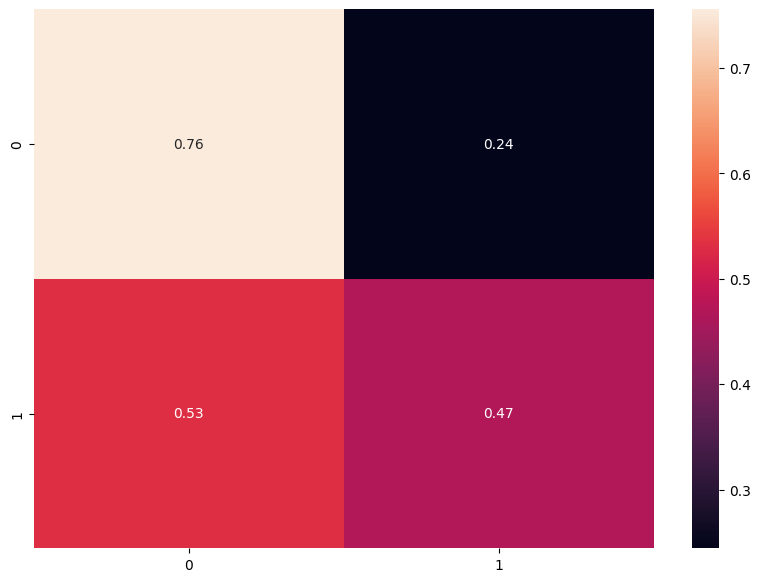

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('InceptionV3','Adam', X_train, y_train, X_test, y_test)

Sigmoid SVM InceptionV3 Adagrad
Acuracy 0.9221019276472141
P,R,F1: (0.9079916429894848, 0.9163487230848981, 0.9119480928306778, None)
CPU times: user 37.3 s, sys: 418 ms, total: 37.7 s
Wall time: 37.7 s


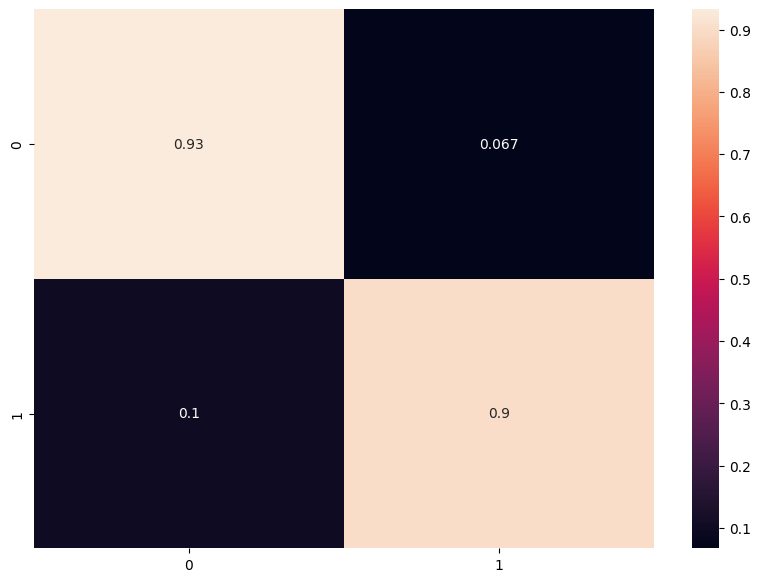

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
SigmoidSVM('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> Poly SVM Test </h1>

POLY SVM VGG16 Adam
Acuracy 0.861499867969369
P,R,F1: (0.9015111890861164, 0.7935544776072745, 0.8220825568183052, None)
CPU times: user 1min 26s, sys: 453 ms, total: 1min 27s
Wall time: 1min 27s


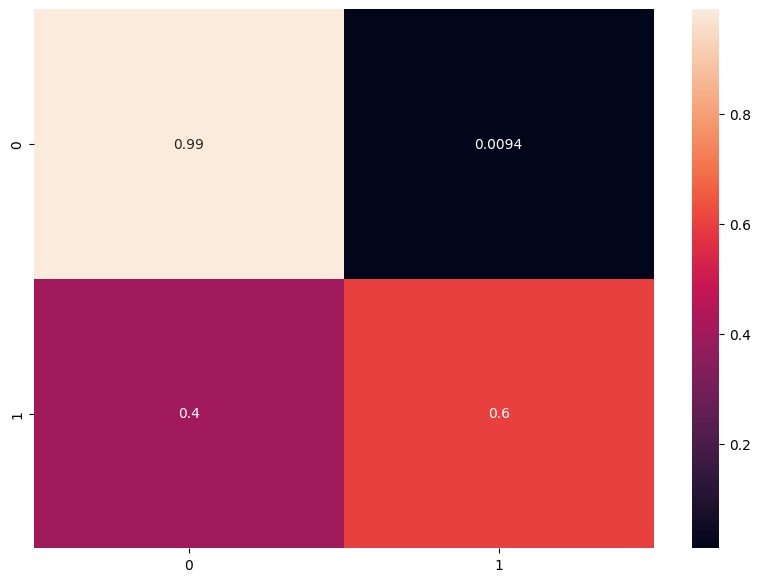

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('VGG16','Adam', X_train, y_train, X_test, y_test)

POLY SVM VGG16 RMSprop
Acuracy 0.8706099815157117
P,R,F1: (0.9026065973473201, 0.8127134026027913, 0.8387653707398113, None)
CPU times: user 1min 20s, sys: 552 ms, total: 1min 21s
Wall time: 1min 21s


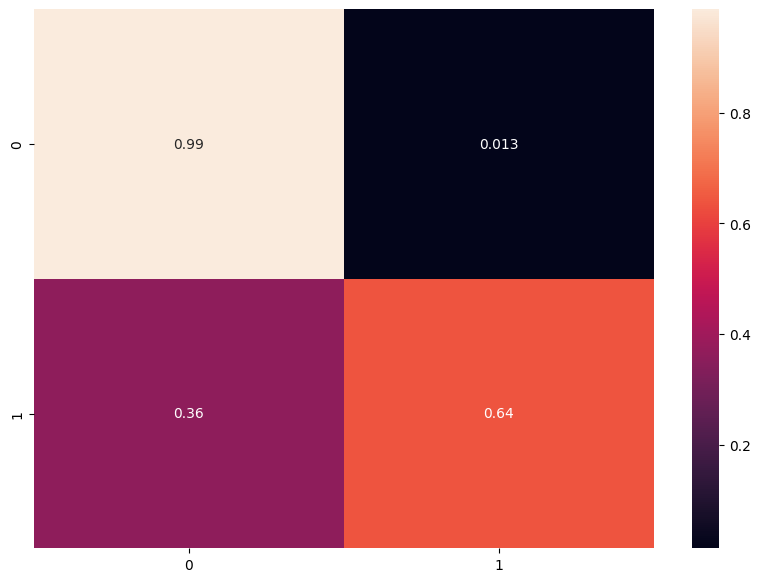

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('VGG16','RMSprop', X_train, y_train, X_test, y_test)

POLY SVM InceptionV3 Adam
Acuracy 0.9139160285186163
P,R,F1: (0.8962198031585629, 0.9186772362339013, 0.9054038760472192, None)
CPU times: user 1min 45s, sys: 452 ms, total: 1min 45s
Wall time: 1min 45s


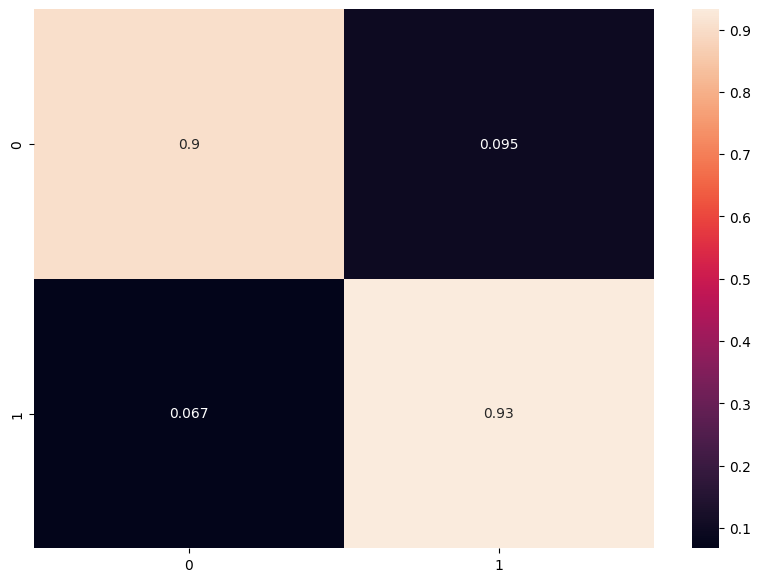

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('InceptionV3','Adam', X_train, y_train, X_test, y_test)

POLY SVM InceptionV3 Adagrad
Acuracy 0.9912859783469765
P,R,F1: (0.9870486656200942, 0.9935192458758837, 0.9901778496838696, None)
CPU times: user 23.6 s, sys: 369 ms, total: 24 s
Wall time: 24 s


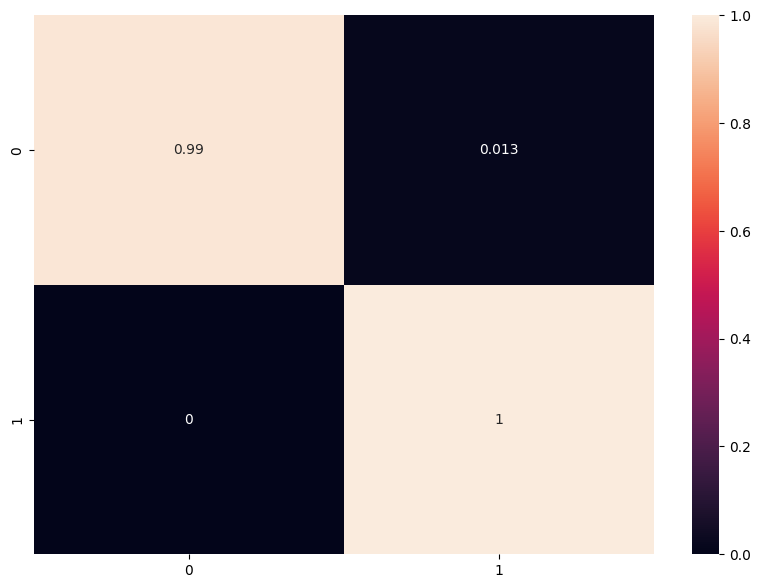

In [ ]:
%%time
data = pd.read_csv('../input/re-arranged-data/sign_data/data.csv')
X_data = data[['img1','img2']]
y_data = data[['target']]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33)
PolySVM('InceptionV3','Adagrad', X_train, y_train, X_test, y_test)

<h1> Classification Best Performing Models </h1>

1. Average training time for Inception-v3-Adagrad architecture is significantly lower than other architectures.
2. Best performing model is Poly SVM with the accuracy of 99.28 %.
3. We have classified the fraud signature with accuracy of 99.999 %.
4. We have classified the genuine with accuracy of 99.00 %.